<a href="https://colab.research.google.com/github/NantoCaparachin/Analisis_Descriptivos/blob/main/Networkx_python_Eurovision_2012_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import networkx as nx
import os
import matplotlib.pyplot as plt
import plotly.express as px
from  community import community_louvain

import warnings
warnings.filterwarnings('ignore')

In [2]:
digrafo = nx.read_gexf("Eurovision_2012_2.gexf",)

1. Información general del grafo

In [3]:
g = digrafo.to_undirected()
nx.info(g)

'Graph with 42 nodes and 345 edges'

In [4]:
comunidades = community_louvain.best_partition(g)

2. Cantidad de comunidades

In [5]:
print(f"En total tenemos: {len(set(comunidades.values()))} comunidades")

En total tenemos: 4 comunidades


3. Pagerank - 5 primeros

In [6]:
pagerank = nx.pagerank(g)
print(pagerank)

{'Albania': 0.03814320856706532, 'Austria': 0.015510791202402993, 'Azerbaijan': 0.039053821136873806, 'Belarus': 0.015659230533726587, 'Belgium': 0.015527648826803627, 'Bosnia & Herzegovina': 0.022283792495954417, 'Bulgaria': 0.015448850041133933, 'Croatia': 0.015607702463430982, 'Cyprus': 0.018018064266660326, 'Denmark': 0.0161227175930564, 'Estonia': 0.03195124398366229, 'Finland': 0.015659567774954898, 'France': 0.0177660597532322, 'Germany': 0.03476891540902033, 'Georgia': 0.01557411160258245, 'Greece': 0.018574082822330636, 'Hungary': 0.01857694297748692, 'Iceland': 0.022572078950092653, 'Ireland': 0.022404299589568837, 'Israel': 0.0155541725575617, 'Italy': 0.03332020107966823, 'Latvia': 0.015628688699251384, 'Lithuania': 0.026965019902164867, 'F.Y.R. Macedonia': 0.022570371848485968, 'Malta': 0.01697768491942173, 'Moldova': 0.02620942925012311, 'Montenegro': 0.015548601514300847, 'The Netherlands': 0.015599697270098273, 'Norway': 0.014414835579342918, 'Portugal': 0.0155803393952

In [7]:
import operator

pagerank_ordenado = sorted(pagerank.items(), key=operator.itemgetter(1), reverse=True)
print(pagerank_ordenado[:5])

[('Sweden', 0.07673279949683326), ('Russia', 0.05922582101389474), ('Serbia', 0.05066005214792), ('Azerbaijan', 0.039053821136873806), ('Albania', 0.03814320856706532)]


4. Gráfica de los nodos, identificando las comunidades por colores

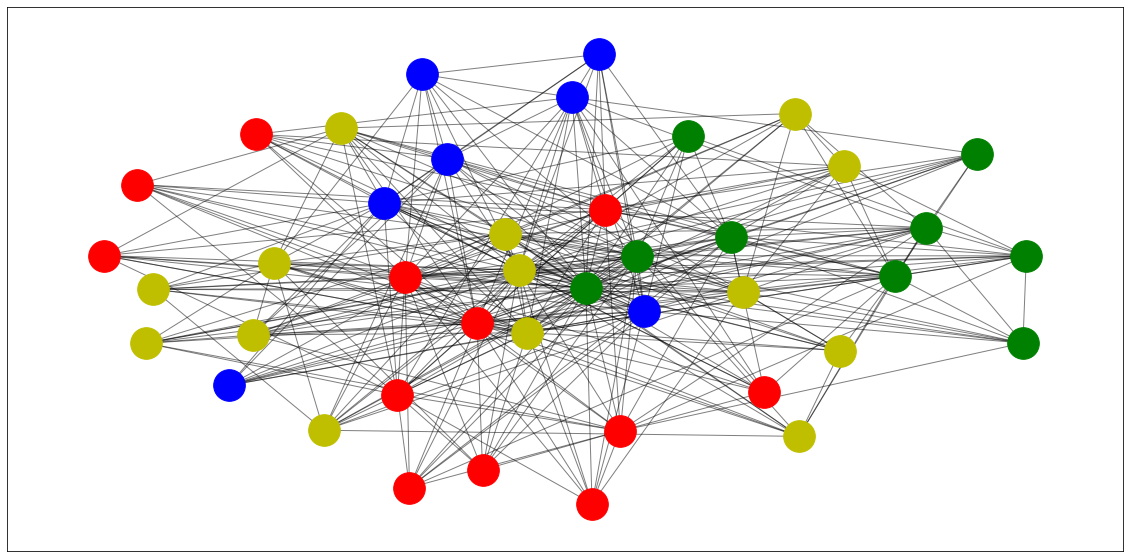

In [9]:
plt.figure(figsize=(20,10))

c = 'rgby'
pos = nx.spring_layout(g)

#dibujar cada comunidad
i = 0
for com in set(comunidades.values()):
  list_nodes = [nodo for nodo in comunidades if comunidades[nodo] == com]
  nx.draw_networkx_nodes(g, pos, list_nodes, node_size=1000, node_color=c[i])
  i += 1
#dibujar las aristas
nx.draw_networkx_edges(g, pos, alpha=.5)
plt.show()

5. Graficar unicamente la comunidad 2

In [11]:
communities = {c:[] for c in set(comunidades.values())}
print(communities)
for k in comunidades:
  communities[comunidades[k]].append(k)
for c in communities:
  print(c, len(communities[c]))

{0: [], 1: [], 2: [], 3: []}
0 12
1 9
2 7
3 14


In [12]:
sg = nx.subgraph(g,communities[2])

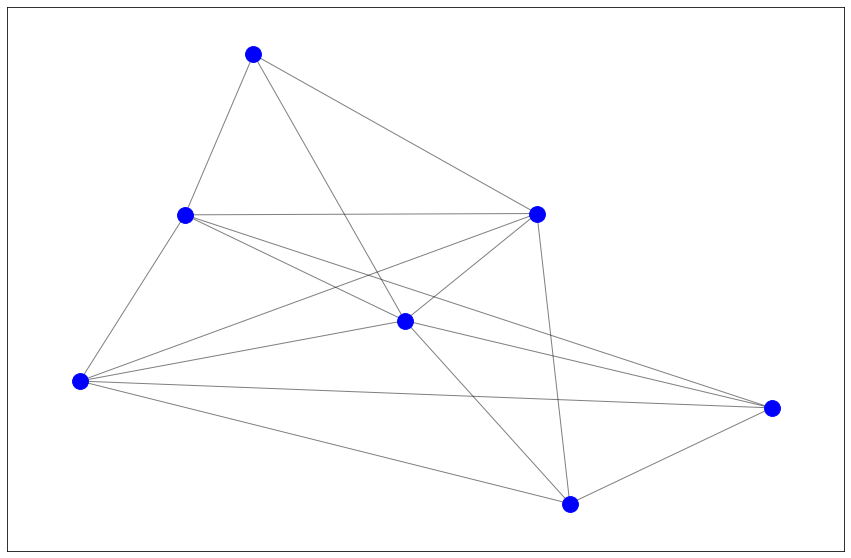

In [21]:
from networkx.algorithms.bipartite import color
plt.figure(figsize=(15,10))
pos = nx.spring_layout(sg)
nx.draw_networkx_nodes(sg,pos,node_size=250,node_color=["b"],)
nx.draw_networkx_edges(sg, pos, alpha=.5)
plt.show()